# Assignment 4

### 01-introduction-geospatial-data

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

In [5]:
stations = geopandas.read_file("data/paris_bike_stations_mercator.gpkg")

In [6]:
type(stations)

geopandas.geodataframe.GeoDataFrame

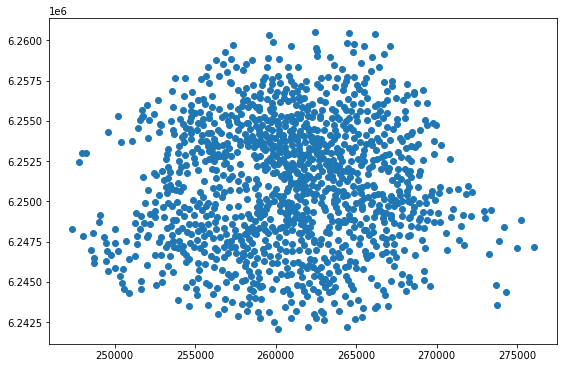

In [7]:
stations.plot(figsize=(12,6))

In [8]:
import contextily

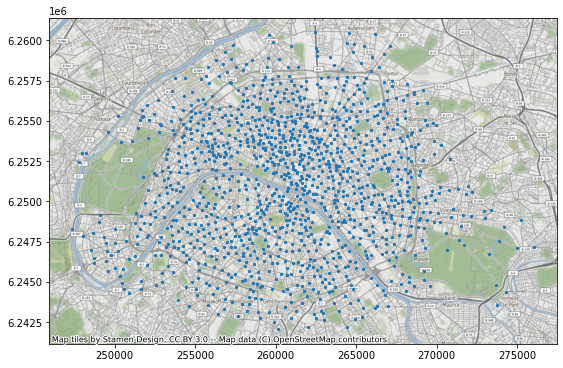

In [9]:
ax = stations.plot(figsize=(12,6), markersize=5)
contextily.add_basemap(ax)

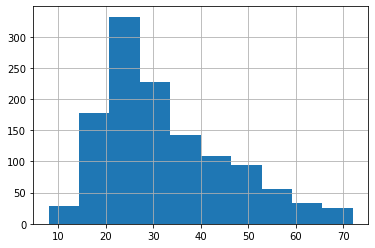

In [10]:
stations['bike_stands'].hist()

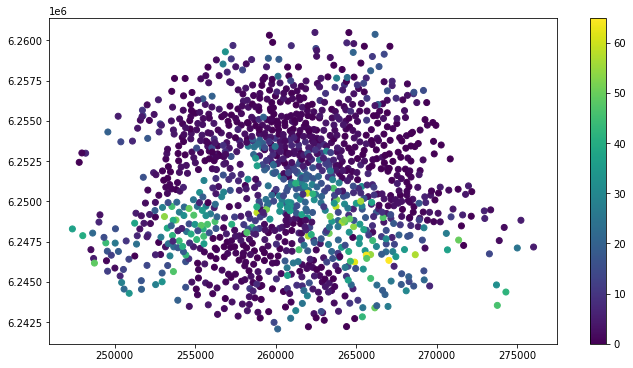

In [11]:
stations.plot(figsize=(12, 6), column='available_bikes', legend=True)

In [34]:
districts = geopandas.read_file("data/paris_districts_utm.geojson")

In [35]:
districts.shape

(80, 4)

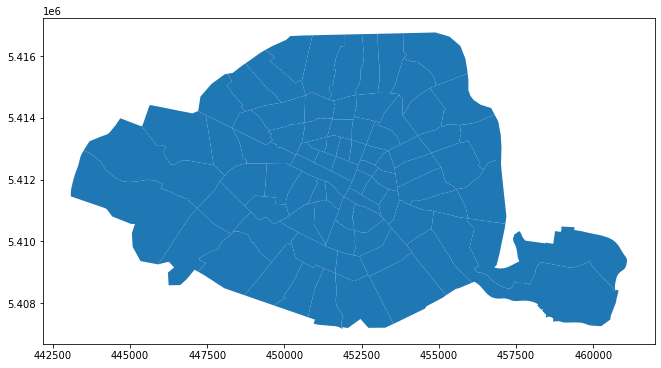

In [36]:
districts.plot(figsize=(12, 6))

In [37]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [38]:
districts['area'] = districts.geometry.area / 1e6

In [39]:
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",0.271603
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",0.269311
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",0.243418
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",0.213201


In [40]:
districts['population_density'] = districts['population'] / districts.geometry.area * 10**6

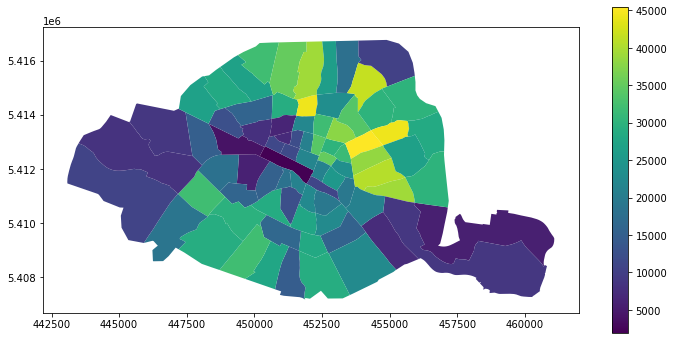

In [41]:
districts.plot(column='population_density', figsize=(12, 6), legend=True)

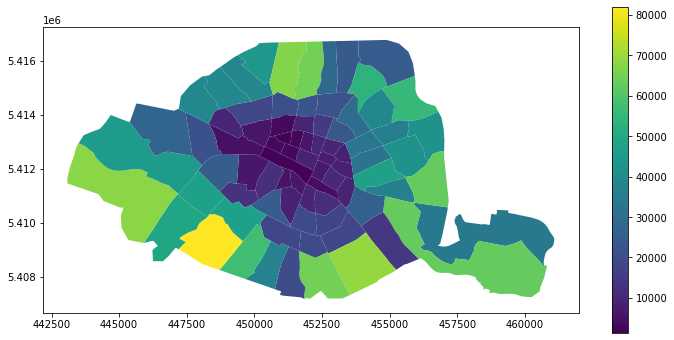

In [42]:
districts.plot(column='population', figsize=(12, 6), legend=True)

### 02-coordinate-reference-systems

In [43]:
districts2 = geopandas.read_file("data/paris_districts.geojson")

In [44]:
districts2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
districts2.head()

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((2.34459 48.85405, 2.34459 48.85405, ..."
1,2,Halles,8984,"POLYGON ((2.34937 48.86058, 2.34822 48.85852, ..."
2,3,Palais-Royal,3195,"POLYGON ((2.33947 48.86214, 2.33912 48.86148, ..."
3,4,Place-Vendôme,3044,"POLYGON ((2.33194 48.86491, 2.33135 48.86399, ..."
4,5,Gaillon,1345,"POLYGON ((2.33632 48.86797, 2.33587 48.86700, ..."


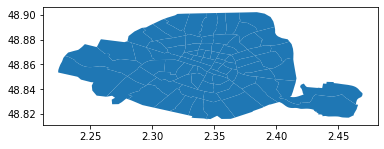

In [46]:
districts2.plot()

In [32]:
districts2.geometry.area

0     0.000107
1     0.000051
2     0.000034
3     0.000033
4     0.000023
        ...   
75    0.000159
76    0.000099
77    0.000182
78    0.000196
79    0.000256
Length: 80, dtype: float64

In [31]:
districts_RGF93 = districts2.to_crs(epsg=2154)

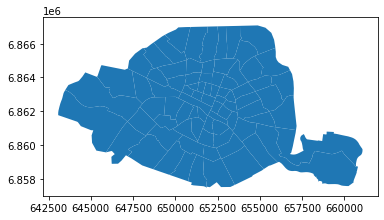

In [47]:
districts_RGF93.plot()

In [48]:
districts_RGF93.geometry.area

0     8.690007e+05
1     4.124585e+05
2     2.736968e+05
3     2.694568e+05
4     1.880122e+05
          ...     
75    1.294988e+06
76    8.065686e+05
77    1.486971e+06
78    1.599002e+06
79    2.090904e+06
Length: 80, dtype: float64

In [49]:
stations = geopandas.read_file("data/paris_bike_stations.geojson")
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40591 48.84772)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40517 48.85550)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43737 48.85770)
4,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079 48.84149)


In [50]:
stations_webmercator = stations.to_crs(epsg=3857)
stations.head()

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (2.32956 48.83920)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (2.40591 48.84772)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (2.40517 48.85550)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (2.43737 48.85770)
4,43006 - MINIMES (VINCENNES),28,27,POINT (2.43079 48.84149)


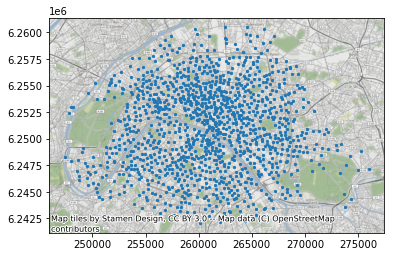

In [51]:
import contextily
ax = stations_webmercator.plot(markersize=5)
contextily.add_basemap(ax)

### 03-spatial-relationships-operations

#### Part 1

In [52]:
districts = geopandas.read_file("data/paris_districts.geojson").to_crs(epsg=2154)
stations = geopandas.read_file("data/paris_bike_stations.geojson").to_crs(epsg=2154)

In [53]:
from shapely.geometry import Point

In [54]:
eiffel_tower = Point(648237.3, 6862271.9)

In [55]:
district_montparnasse = districts.loc[52, 'geometry']
bike_station = stations.loc[293, 'geometry']

In [56]:
print(eiffel_tower.within(district_montparnasse))

False


In [57]:
print(district_montparnasse.contains(bike_station))

True


In [58]:
print(eiffel_tower.distance(bike_station))

3540.1534488921966


In [59]:
eiffel_tower = Point(648237.3, 6862271.9)

In [60]:
mask = districts.contains(eiffel_tower)
mask

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [61]:
districts[mask]

,id,district_name,population,geometry
27,28,Gros-Caillou,25156,"POLYGON ((649336.752 6861767.761, 649110.815 6..."


In [62]:
dist_eiffel = stations.distance(eiffel_tower)

In [63]:
dist_eiffel.min()

232.34672323454004

In [64]:
stations_eiffel = stations[dist_eiffel < 1000]

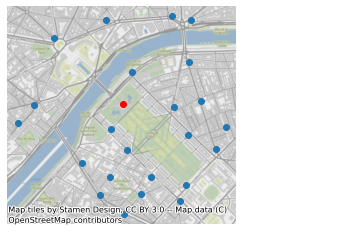

In [65]:
ax = stations_eiffel.to_crs(epsg=3857).plot()
geopandas.GeoSeries([eiffel_tower], crs='EPSG:2154').to_crs(epsg=3857).plot(ax=ax, color='red')
import contextily
contextily.add_basemap(ax)
ax.set_axis_off()

#### Part 2

In [67]:
s_seine = geopandas.GeoDataFrame.from_features({"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"LineString","coordinates":[[2.408924102783203,48.805619828930226],[2.4092674255371094,48.81703747481909],[2.3927879333496094,48.82325391133874],[2.360687255859375,48.84912860497674],[2.338714599609375,48.85827758964043],[2.318115234375,48.8641501307046],[2.298717498779297,48.863246707697],[2.2913360595703125,48.859519915404825],[2.2594070434570312,48.8311646245967],[2.2436141967773438,48.82325391133874],[2.236919403076172,48.82347994904826],[2.227306365966797,48.828339513221444],[2.2224998474121094,48.83862215329593],[2.2254180908203125,48.84856379804802],[2.2240447998046875,48.85409863123821],[2.230224609375,48.867989496547864],[2.260265350341797,48.89192242750887],[2.300262451171875,48.910203080780285]]}}]},
                                               crs={'init': 'epsg:4326'})

In [68]:
s_seine_utm = s_seine.to_crs(epsg=2154)

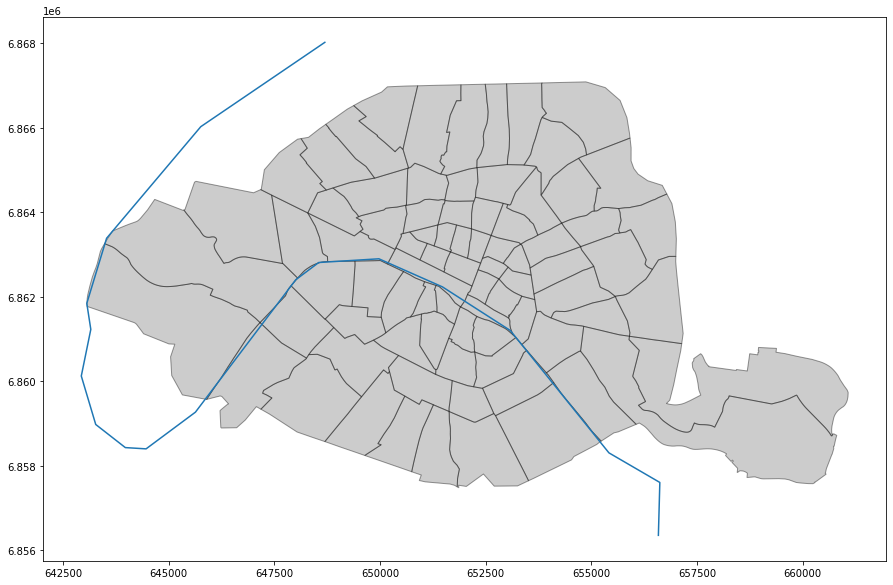

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)

In [70]:
seine = s_seine_utm.geometry.squeeze()

In [75]:
seine_buffer = seine.buffer(150)

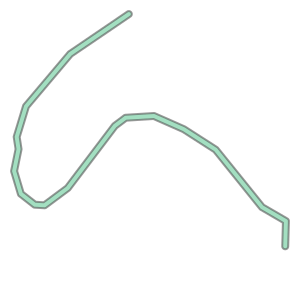

In [76]:
seine_buffer

In [77]:
districts_seine = districts[districts.intersects(seine_buffer)]

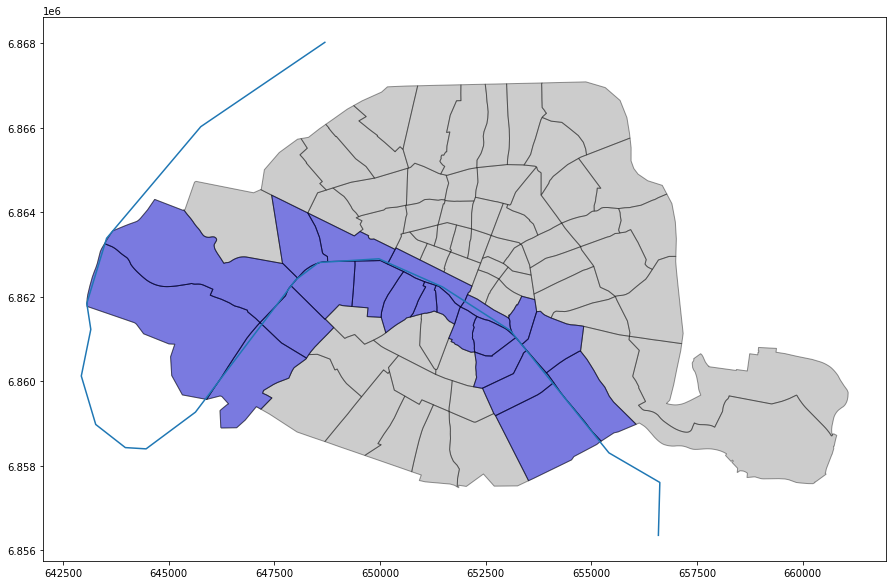

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
districts.plot(ax=ax, color='grey', alpha=0.4, edgecolor='k')
districts_seine.plot(ax=ax, color='blue', alpha=0.4, edgecolor='k')
s_seine_utm.plot(ax=ax)